In [108]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras import losses
from keras import metrics
from keras import optimizers

In [109]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()


In [110]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


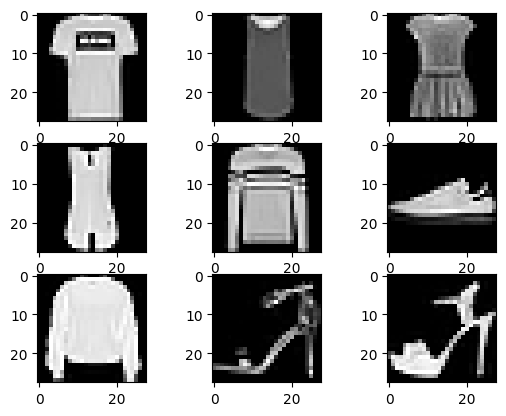

In [111]:
for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(train_imgs[i], cmap = plt.get_cmap("gray"))
plt.show()

In [112]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [113]:
#from keras.api._v2.keras import activations
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation="relu"),
    Dense(32, activation="relu" ),
    Dense(10, activation='softmax')
    
])
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',

              metrics = ['accuracy'])


In [114]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_54 (Dense)            (None, 128)               100480    
                                                                 
 dense_55 (Dense)            (None, 32)                4128      
                                                                 
 dense_56 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [115]:
from tensorflow.python import train
valid_imgs = train_imgs[:10000]
partial_train_imgs = train_imgs[10000:]

valid_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [116]:
history= model.fit(
    train_imgs,
    train_labels,
    epochs=15, 
    batch_size = 200,
    validation_data=(valid_imgs, valid_labels)
)

Epoch 1/15
300/300 [==============================] - 5s 12ms/step - loss: 0.6293 - accuracy: 0.7872 - val_loss: 0.4559 - val_accuracy: 0.8385
Epoch 2/15
300/300 [==============================] - 2s 7ms/step - loss: 0.4224 - accuracy: 0.8515 - val_loss: 0.3825 - val_accuracy: 0.8668
Epoch 3/15
300/300 [==============================] - 2s 7ms/step - loss: 0.3794 - accuracy: 0.8658 - val_loss: 0.3482 - val_accuracy: 0.8771
Epoch 4/15
300/300 [==============================] - 2s 7ms/step - loss: 0.3518 - accuracy: 0.8751 - val_loss: 0.3753 - val_accuracy: 0.8657
Epoch 5/15
300/300 [==============================] - 3s 9ms/step - loss: 0.3335 - accuracy: 0.8808 - val_loss: 0.3063 - val_accuracy: 0.8943
Epoch 6/15
300/300 [==============================] - 2s 8ms/step - loss: 0.3150 - accuracy: 0.8875 - val_loss: 0.2957 - val_accuracy: 0.8926
Epoch 7/15
300/300 [==============================] - 2s 7ms/step - loss: 0.3020 - accuracy: 0.8908 - val_loss: 0.2943 - val_accuracy: 0.8942
Epoch

In [117]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


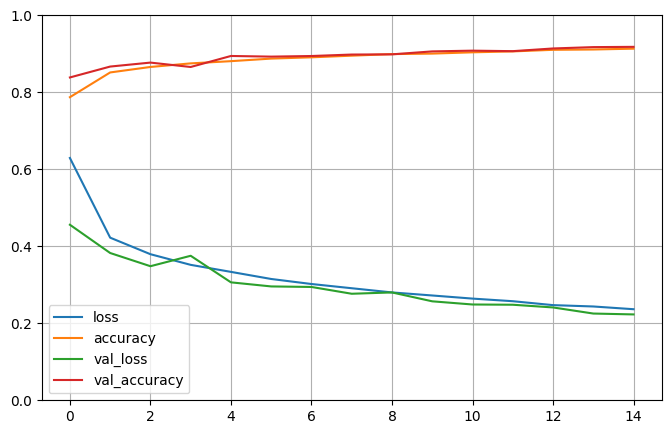

In [118]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

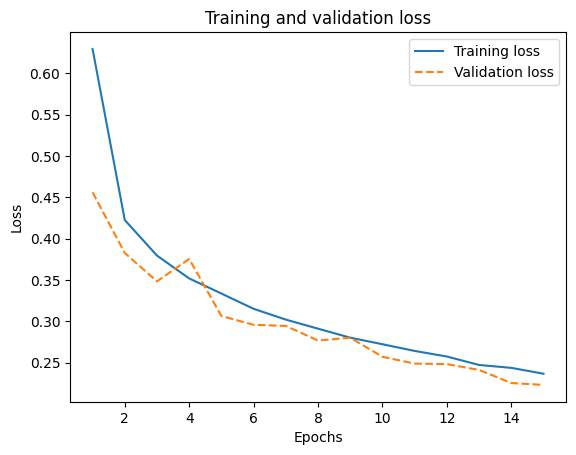

Text(0.5, 1.0, 'Training and validation accurancy')

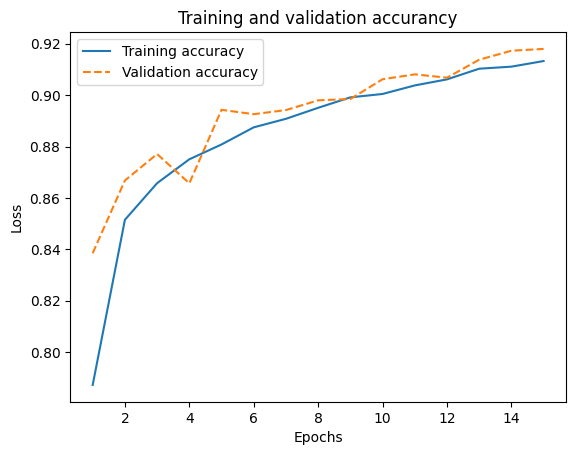

In [119]:
hist_dict = history.history
values_loss= hist_dict["loss"]
values_loss_valid = hist_dict['val_loss']
epochs=range(1, len(hist_dict['accuracy']) +1)

plt.plot(epochs, values_loss, '-', label='Training loss')
plt.plot(epochs, values_loss_valid, '--', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()

plt.clf()
values_accuracy_valid = hist_dict['val_accuracy']
plt.plot(epochs, hist_dict['accuracy'], '-', label='Training accuracy')
plt.plot(epochs, hist_dict['val_accuracy'], '--', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and validation accurancy")

In [120]:
results=model.evaluate(test_imgs, test_labels)
print(results)

313/313 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8796
[0.3349606692790985, 0.8795999884605408]


In [125]:
res=model.predict(test_imgs)
print(res)

313/313 [==============================] - 1s 2ms/step
[[7.1477626e-07 1.4653735e-09 2.3277082e-06 ... 9.7571015e-03
  3.4147175e-05 9.8824257e-01]
 [3.4976903e-05 1.0185111e-09 9.9771529e-01 ... 1.3409566e-13
  1.2565964e-07 4.1803808e-15]
 [1.2868522e-07 9.9999958e-01 1.0442058e-07 ... 1.5775591e-15
  1.3834849e-11 7.9614700e-14]
 ...
 [1.7942524e-03 2.6450425e-07 2.9499663e-04 ... 5.5689435e-07
  9.9755973e-01 1.6773091e-08]
 [1.5187154e-06 9.9984765e-01 3.3225301e-06 ... 7.3274192e-11
  2.1646542e-08 2.0547639e-09]
 [1.7169261e-04 2.5281925e-05 3.1457865e-05 ... 5.7991398e-03
  1.3681219e-04 6.3207910e-05]]


In [126]:
from keras import layers
model=Sequential()
model.add(layers.Flatten(input_shape = (28, 28)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(32, activation="relu" ))
model.add(layers.Dense(10, activation='softmax'))    
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                  )
model.fit(train_imgs, train_labels, epochs=12, batch_size=200)

results=model.evaluate(test_imgs, test_labels)
print(results)

Epoch 1/12
300/300 [==============================] - 3s 7ms/step - loss: 0.6028 - accuracy: 0.7981
Epoch 2/12
300/300 [==============================] - 2s 6ms/step - loss: 0.4058 - accuracy: 0.8566
Epoch 3/12
300/300 [==============================] - 2s 8ms/step - loss: 0.3661 - accuracy: 0.8707
Epoch 4/12
300/300 [==============================] - 3s 10ms/step - loss: 0.3423 - accuracy: 0.8769
Epoch 5/12
300/300 [==============================] - 2s 8ms/step - loss: 0.3212 - accuracy: 0.8845
Epoch 6/12
300/300 [==============================] - 2s 6ms/step - loss: 0.3054 - accuracy: 0.8897
Epoch 7/12
300/300 [==============================] - 2s 6ms/step - loss: 0.2936 - accuracy: 0.8931
Epoch 8/12
300/300 [==============================] - 2s 6ms/step - loss: 0.2850 - accuracy: 0.8975
Epoch 9/12
300/300 [==============================] - 2s 7ms/step - loss: 0.2718 - accuracy: 0.9012
Epoch 10/12
300/300 [==============================] - 3s 9ms/step - loss: 0.2649 - accuracy: 0.903

In [128]:
results=model.evaluate(test_imgs, test_labels)
res = model.predict(test_imgs)
print(res)

313/313 [==============================] - 1s 2ms/step
[[1.4350081e-06 8.6745285e-07 1.3512317e-06 ... 2.8706556e-02
  6.8504428e-06 9.6503562e-01]
 [2.0164084e-04 1.3315599e-08 9.9671257e-01 ... 9.4001647e-12
  5.2462799e-08 1.8804472e-10]
 [1.3121307e-06 9.9999839e-01 1.7907663e-08 ... 7.1216010e-16
  6.5065467e-11 2.7097567e-15]
 ...
 [2.5043389e-04 3.7652896e-07 6.1520835e-04 ... 1.9989420e-06
  9.9858940e-01 2.7116679e-08]
 [6.1460805e-06 9.9977660e-01 5.2615781e-07 ... 3.5574734e-11
  5.0281121e-09 1.5028321e-09]
 [2.3096791e-05 1.6521232e-06 3.6520316e-06 ... 1.4814355e-03
  2.1561440e-04 1.8434351e-06]]
